# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.

2. Scroll down to API and click Create New API Token.

3. Open up `kaggle.json` and use the username and key.


## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-23.1.2-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
  Using cached setuptools-67.8.0-py3-none-any.whl (1.1 MB)
  Using cached wheel-0.40.0-py3-none-any.whl (64 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.3.0
    Uninstalling setuptools-59.3.0:
      Successfully uninstalled setuptools-59.3.0
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
  Using cached bokeh-2.0.1-py3-none-any.whl
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.2
    Uninstalling bokeh-2.4.2:
      Successfully uninstalled bokeh-2.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.5/226.5 kB 141.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 161.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.5/292.5 kB 204.9 MB/s eta 0:00:00
     ━━━━━━━━━━━

### Setup Kaggle API Key

In [3]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "danialturing"
kaggle_key = "16fcdc5860f8e132dd91ad618124006d"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms


In [50]:
!pip uninstall --y kaggle 
!pip install kaggle --user

Found existing installation: kaggle 1.5.13
Uninstalling kaggle-1.5.13:
  Successfully uninstalled kaggle-1.5.13
  Using cached kaggle-1.5.13-py3-none-any.whl
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [51]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

/bin/sh: 1: kaggle: not found
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

/usr/local/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv')
train['datetime']=pd.to_datetime(train["datetime"])
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.

In [7]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv')
test['datetime']=pd.to_datetime(test["datetime"])
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [8]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission['datetime']=pd.to_datetime(submission["datetime"])
submission.head()

datetime  count
0 2011-01-20 00:00:00      0
1 2011-01-20 01:00:00      0
2 2011-01-20 02:00:00      0
3 2011-01-20 03:00:00      0
4 2011-01-20 04:00:00      0

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [9]:

predictor = TabularPredictor(
    label="count", problem_type="regression", eval_metric="rmse"
    ).fit(
    train_data=train.drop(['casual', 'registered'], axis=1),
    time_limit=600,
    presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20230605_152846/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230605_152846/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Apr 25 15:24:19 UTC 2023
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2796.25 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note:

### Review AutoGluon's training run with ranking of models that did the best.

In [10]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.007873      16.942971  553.405808                0.001359           0.412145            3       True         14
1   RandomForestMSE_BAG_L2  -53.289896      12.901371  413.725246                0.646194          26.772661            2       True         12
2          LightGBM_BAG_L2  -55.148321      12.527481  412.989960                0.272303          26.037374            2       True         11
3          CatBoost_BAG_L2  -55.596630      12.448940  446.044766                0.193762          59.092180            2       True         13
4        LightGBMXT_BAG_L2  -60.462039      15.829354  441.091447                3.574176          54.138861            2       True         10
5    KNeighborsDist_BAG_L1  -84.125061       0.103854    0.036797         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54

### Create predictions from test dataset

In [11]:
predictions = predictor.predict(test)
predictions = {'datetime': test['datetime'], 'Pred_count': predictions}
predictions = pd.DataFrame(data=predictions)
predictions.head()

datetime  Pred_count
0 2011-01-20 00:00:00   23.682598
1 2011-01-20 01:00:00   42.134594
2 2011-01-20 02:00:00   45.591537
3 2011-01-20 03:00:00   49.247379
4 2011-01-20 04:00:00   51.787819

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [12]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

Pred_count
count  6493.000000
mean    100.841461
std      89.883469
min       2.928975
25%      20.593060
50%      64.264839
75%     166.715347
max     364.384460

In [13]:
# How many negative values do we have?
neg = predictions.groupby(predictions['Pred_count'])

# lambda function
def minus(val):
   return val[val < 0].sum()

print(neg['Pred_count'].agg([('negcount', minus)]))

            negcount
Pred_count          
2.928975         0.0
2.994087         0.0
3.145769         0.0
3.172926         0.0
3.175307         0.0
...              ...
363.050751       0.0
363.391388       0.0
363.769623       0.0
363.787567       0.0
364.384460       0.0

[6184 rows x 1 columns]


In [14]:
# Set them to zero
predictions[predictions['Pred_count']<0] = 0

In [15]:
predictions.describe()

Pred_count
count  6493.000000
mean    100.841461
std      89.883469
min       2.928975
25%      20.593060
50%      64.264839
75%     166.715347
max     364.384460

In [16]:
predictions.head()

datetime  Pred_count
0  2011-01-20 00:00:00   23.682598
1  2011-01-20 01:00:00   42.134594
2  2011-01-20 02:00:00   45.591537
3  2011-01-20 03:00:00   49.247379
4  2011-01-20 04:00:00   51.787819

### Set predictions to submission dataframe, save, and submit

In [17]:
submission["count"] = predictions['Pred_count']
submission.to_csv("submission.csv", index=False)

In [18]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

/bin/sh: 1: kaggle: not found


#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [19]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

/bin/sh: 1: kaggle: not found


#### Initial score of 1.39920

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>],
       [<AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>]], dtype=object)

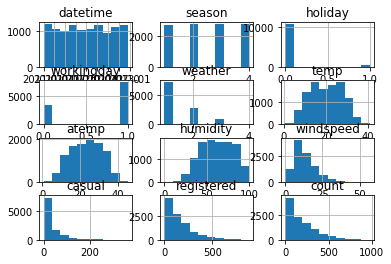

In [20]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [21]:
# create a new feature
train.loc[:, "datetime"] = pd.to_datetime(train.loc[:, "datetime"])
test.loc[:, "datetime"] = pd.to_datetime(test.loc[:, "datetime"])

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [22]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [23]:
# View are new feature
train.head()

datetime season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1        0           0       1  9.84  14.395   
1 2011-01-01 01:00:00      1        0           0       1  9.02  13.635   
2 2011-01-01 02:00:00      1        0           0       1  9.02  13.635   
3 2011-01-01 03:00:00      1        0           0       1  9.84  14.395   
4 2011-01-01 04:00:00      1        0           0       1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  
0        81        0.0       3          13     16  2011      1    1     0  
1        80        0.0       8          32     40  2011      1    1     1  
2        80        0.0       5          27     32  2011      1    1     2  
3        75        0.0       3          10     13  2011      1    1     3  
4        75        0.0       0           1      1  2011      1    1     4

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'hour'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

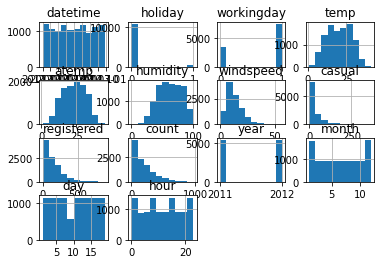

In [24]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [25]:
predictor_new_features = TabularPredictor(
    label="count", problem_type="regression", eval_metric="rmse"
    ).fit(
    train_data=train.drop(['casual', 'registered'], axis=1),
    time_limit=600,
    presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20230605_153937/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230605_153937/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Apr 25 15:24:19 UTC 2023
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1997.12 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note

In [26]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.197500      20.750463  556.224760                0.001019           0.297379            3       True         14
1          CatBoost_BAG_L2  -30.488453      19.016719  466.781491                0.102315          69.117287            2       True         13
2          LightGBM_BAG_L2  -30.528544      19.299628  424.964031                0.385224          27.299827            2       True         11
3        LightGBMXT_BAG_L2  -31.372904      19.604001  428.053215                0.689598          30.389011            2       True         10
4   RandomForestMSE_BAG_L2  -31.568881      19.572307  429.121256                0.657903          31.457052            2       True         12
5      WeightedEnsemble_L2  -32.139555      17.700324  350.118742         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.34599701170154,
  'LightGBM_BAG_L1': -33.91733862651761,
  'RandomForestMSE_BAG_L1': -38.314

In [27]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features = {'datetime': test['datetime'], 'Pred_count': predictions_new_features}
predictions_new_features = pd.DataFrame(data=predictions_new_features)
predictions_new_features.head()

datetime  Pred_count
0 2011-01-20 00:00:00   15.420746
1 2011-01-20 01:00:00   11.483299
2 2011-01-20 02:00:00   10.551161
3 2011-01-20 03:00:00    9.048966
4 2011-01-20 04:00:00    7.995824

In [28]:
# Remember to set all negative values to zero
predictions_new_features[predictions_new_features['Pred_count']<0] = 0

In [29]:
predictions_new_features.describe()

Pred_count
count  6493.000000
mean    152.317810
std     131.275696
min       2.070267
25%      53.275467
50%     118.974930
75%     214.269791
max     815.797729

In [32]:
# Same submitting predictions
submission_new_features = pd.read_csv('submission.csv')
submission_new_features["count"] = predictions_new_features['Pred_count']
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [37]:
!pip install kaggle --user

In [40]:
!echo $PATH

/usr/local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tmp/miniconda3/condabin:/tmp/anaconda3/condabin:/tmp/miniconda2/condabin:/tmp/anaconda2/condabin:/tmp/mambaforge/condabin


In [52]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

/bin/sh: 1: kaggle: not found


In [53]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

/bin/sh: 1: kaggle: not found


#### New Score of `0.47165`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [54]:
import autogluon.core as ag
## From autogluon documentation
nn_options = {  
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability 
}

gbm_options = {  
    'num_boost_round': 100,  # number of boosting rounds 
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN': nn_options, 
                  }  

num_trials = 3  # try at most 3 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # tune hyperparameters using Bayesian optimization routine with a local scheduler

hyperparameter_tune_kwargs = { 
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(
    label="count", problem_type="regression", eval_metric="rmse"
    ).fit(
    train_data=train.drop(['casual', 'registered'], axis=1),
    time_limit=600,
    presets='best_quality', hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

No path specified. Models will be saved in: "AutogluonModels/ag-20230605_161203/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230605_161203/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Apr 25 15:24:19 UTC 2023
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1591.29 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note

In [55]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3 -36.219527       2.182881  379.010763                0.000838           0.266355            3       True          8
1   LightGBM_BAG_L2/T2 -36.275489       1.745885  312.549661                0.273682          63.041447            2       True          6
2   LightGBM_BAG_L2/T1 -36.436234       1.814147  315.039754                0.341944          65.531539            2       True          5
3   LightGBM_BAG_L2/T3 -36.487796       1.908361  315.702962                0.436158          66.194747            2       True          7
4  WeightedEnsemble_L2 -37.562895       0.999304  166.819537                0.000849           0.237144            2       True          4
5   LightGBM_BAG_L1/T3 -37.847172       0.505856   84.432521                0.505856          84.432521 

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -39.552151539578205,
  'LightGBM_BAG_L1/T2': -38.2598796066917,
  'LightGBM_BAG_L1/T3': -37.84717180144987,
  'WeightedEnsemble_L2': -37.56289511485554,
  'LightGBM_BAG_L2/T1': -36.43623412932549,
  'LightGBM_BAG_L2/T2': -36.27548877036851,
  'LightGBM_BAG_L2/T3': -36.48779646028212,
  'WeightedEnsemble_L3': -36.21952718148215},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'LightGBM_BAG_L1/T1': '/root/AutogluonModels/ag-20230605_161203/models/LightGBM_BAG_L1/T1/',
  'LightGBM_BAG_L1/T2': '/root/AutogluonModels/a

In [56]:
prediction_new_hpo = predictor_new_hpo.predict(test)
prediction_new_hpo = {'datetime': test['datetime'], 'Pred_count': prediction_new_hpo}
prediction_new_hpo = pd.DataFrame(data=prediction_new_hpo)
prediction_new_hpo.head()

datetime  Pred_count
0 2011-01-20 00:00:00    9.910567
1 2011-01-20 01:00:00    6.492686
2 2011-01-20 02:00:00    6.473985
3 2011-01-20 03:00:00    6.335672
4 2011-01-20 04:00:00    6.334681

In [57]:
# Remember to set all negative values to zero
prediction_new_hpo[prediction_new_hpo['Pred_count']<0] = 0

In [59]:
# Same submitting predictions
submission_new_hpo = pd.read_csv('submission.csv')
submission_new_hpo["count"] = prediction_new_hpo['Pred_count']
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [60]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

/bin/sh: 1: kaggle: not found


In [61]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

/bin/sh: 1: kaggle: not found


#### New Score of `.50893`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

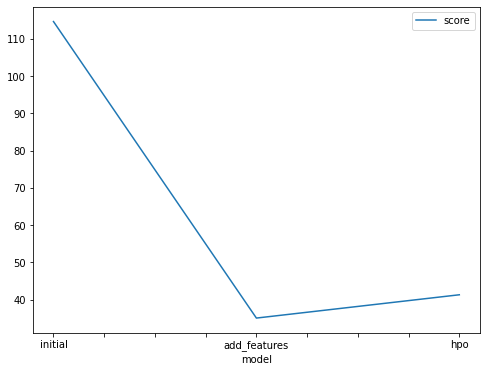

In [62]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [114.633955,  35.029454, 41.282342]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

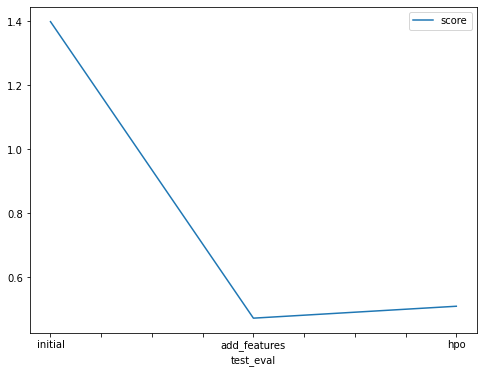

In [63]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.39920,  0.47165, 0.50893]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [64]:
# The 3 hyperparameters we tuned with the kaggle score as the result
hyperparams_df = pd.DataFrame({
    "model": ["initial_model", "add_features_model", "hpo_model"],
    "hpo1": ['default_vals', 'default_vals', 'GBM: num_leaves: lower=26, upper=66'],
    "hpo2": ['default_vals', 'default_vals', 'NN: dropout_prob: 0.0, 0.5'],
    "hpo3": ['default_vals', 'default_vals', 'GBM: num_boost_round: 100'],
    "score": [1.39920,  0.47165, 0.50893]
})

In [65]:
hyperparams_df.head()

model                                 hpo1  \
0       initial_model                         default_vals   
1  add_features_model                         default_vals   
2           hpo_model  GBM: num_leaves: lower=26, upper=66   

                         hpo2                       hpo3    score  
0                default_vals               default_vals  1.39920  
1                default_vals               default_vals  0.47165  
2  NN: dropout_prob: 0.0, 0.5  GBM: num_boost_round: 100  0.50893

In [66]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

In [70]:
sub_new = pd.read_csv('submission_new_features.csv')

Plot time series of train and test data

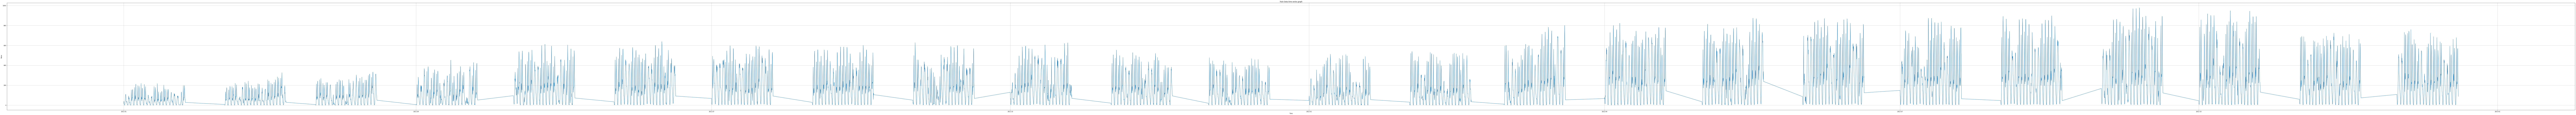

In [71]:
import matplotlib.pyplot as plt
series = train["count"].to_numpy()
time = train["datetime"].to_numpy()


plt.figure(figsize=(350, 15))
plot_series(time, series)
plt.title("Train Data time series graph")
#plot_series(time1, series1)
plt.show()

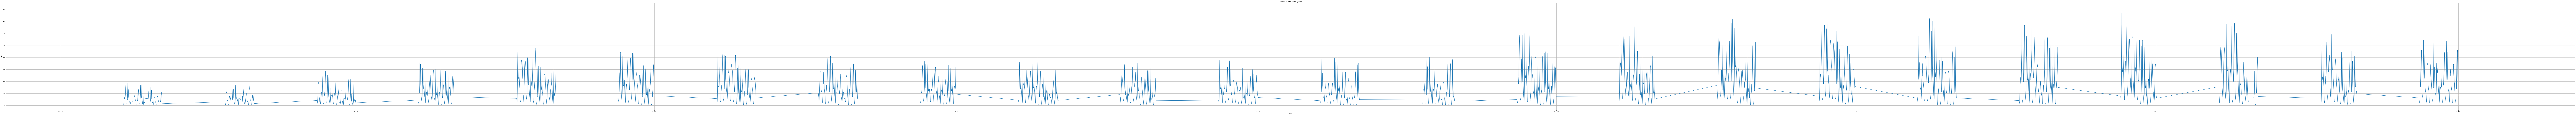

In [72]:
sub_new.loc[:, "datetime"] = pd.to_datetime(sub_new.loc[:, "datetime"])

series1 = sub_new["count"].to_numpy()
time1 = sub_new["datetime"].to_numpy()

plt.figure(figsize=(350, 15))
#plot_series(time, series)
plot_series(time1, series1)
plt.title("Test Data time series graph")
plt.show()

Prediction with XGBoost

In [73]:
import xgboost as xgb

In [74]:
train_df = pd.read_csv('/content/train.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/train.csv'

In [ ]:
test_df = pd.read_csv('/content/test.csv')

In [ ]:
train_df.loc[:, "datetime"] = pd.to_datetime(train_df.loc[:, "datetime"])
test_df.loc[:, "datetime"] = pd.to_datetime(test_df.loc[:, "datetime"])

train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['day'] = train_df['datetime'].dt.day
train_df['hour'] = train_df['datetime'].dt.hour

test_df['year'] = test_df['datetime'].dt.year
test_df['month'] = test_df['datetime'].dt.month
test_df['day'] = test_df['datetime'].dt.day
test_df['hour'] = test_df['datetime'].dt.hour

In [ ]:
trainxgb = train_df.drop(['casual', 'registered','count', 'datetime'], axis=1)
trainxgb.head()

In [ ]:
countxgb = train_df['count']
countxgb.head()

In [ ]:
train_xgb = xgb.DMatrix(
    trainxgb, countxgb
)

params = {"objective": "reg:linear"} #"objective":"reg:linear"
bst = xgb.train(params, train_xgb)

bst.predict(train_xgb)

In [ ]:
!jupyter nbconvert --to html bike_sharing.ipynb